In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV


In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:

# Load the dataset with a different encoding
try:
    data = pd.read_csv("/content/drive/MyDrive/ML/HW3/7/spamSMS.csv", encoding='utf-8')
except UnicodeDecodeError:
    try:
        data = pd.read_csv("/content/drive/MyDrive/ML/HW3/7/spamSMS.csv", encoding='ISO-8859-1')
    except UnicodeDecodeError:
        data = pd.read_csv("/content/drive/MyDrive/ML/HW3/7/spamSMS.csv", encoding='cp1252')


In [4]:
# Print the distribution of tags
print(data['v1'].value_counts())


ham     4825
spam     747
Name: v1, dtype: int64


In [5]:
# Extract features
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(data['v2'])
y = data['v1']



In [6]:
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [7]:
# Define the parameter grid
param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001], 'kernel': ['rbf', 'linear']}

# Create a GridSearchCV object
grid_search = GridSearchCV(SVC(), param_grid, refit=True, verbose=3)

# Fit the model
grid_search.fit(X_train, y_train)

# Print best parameters
print("Best parameters (Grid Search):", grid_search.best_params_)

# Random Search
random_search = RandomizedSearchCV(SVC(), param_grid, n_iter=10, refit=True, verbose=3, random_state=42)
random_search.fit(X_train, y_train)

# Print best parameters
print("Best parameters (Random Search):", random_search.best_params_)


Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.864 total time=   1.9s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.864 total time=   1.9s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.864 total time=   1.8s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.865 total time=   1.8s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.865 total time=   1.9s
[CV 1/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.990 total time=   0.4s
[CV 2/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.983 total time=   0.4s
[CV 3/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.974 total time=   0.4s
[CV 4/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.981 total time=   0.4s
[CV 5/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.979 total time=   0.4s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.864 total time=   1.3s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score

def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)

    # Plotting the confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title('Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()



Grid Search Model Evaluation:


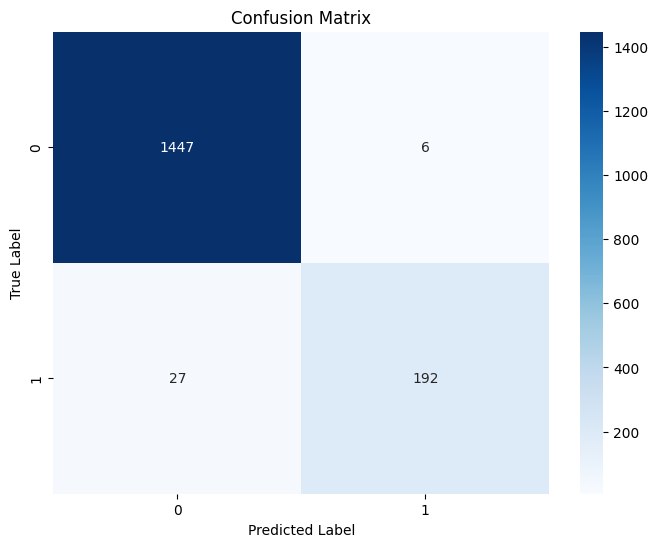


Random Search Model Evaluation:


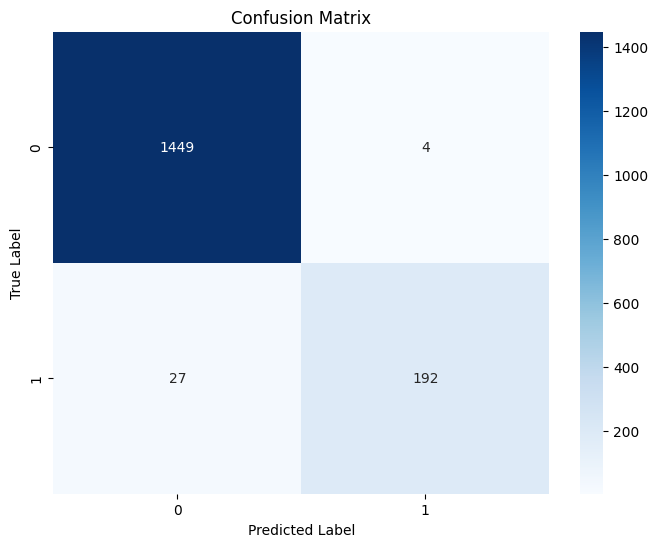

In [9]:
# Evaluate Grid Search Model
print("Grid Search Model Evaluation:")
evaluate_model(grid_search, X_test, y_test)

# Evaluate Random Search Model
print("\nRandom Search Model Evaluation:")
evaluate_model(random_search, X_test, y_test)
